In [890]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Question 7.1

Let $X = Z^{2}$ where $Z\sim \mathcal{N}(0,1)$ is the standard normal. The random variable $X$ has a chi-squared distribution with 1 degree of freedom. For each of the following problems, calculate the answer in the following two ways:

A) Using Monte Carlo methods, sampling from a standard normal distribution, and taking the number of samples equal to $10^{k}$ for each value $k=2,4,6.$

B) Using the appropriate built-in functions from your prefered computational tool.

Compare the results of the various computations

i) Plot the pdf of the random variable X (experiment to find a good  number of bins for your histogram)

ii) Compute the c.d.f. $F_{X}(x)$ for $x\in \{0.5, 1.0, 1.5\}$

iii) Compute the expected value $\mathbb{E}[X]$

iv) Compute the variance Var $(X)$.

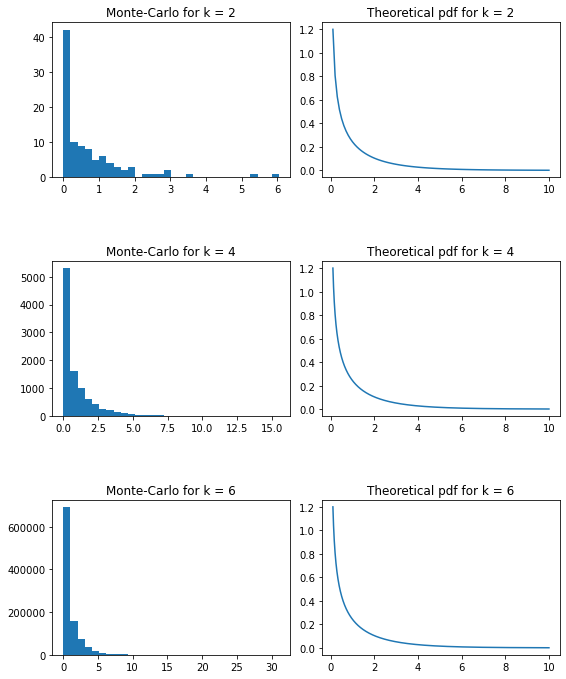

In [891]:
# Part i)

# Run through all of the values of k
exponent = [2,4,6]
for i in exponent:
    # Part A)

    # Get the right subplot and make random draws and plot them for each k
    plt.subplot(3,2,2 * exponent.index(i)+1)
    x = np.random.normal(0,1,10 ** i) ** 2
    plt.hist(x, bins=30)
    
    # Label the plot
    plt.title('Monte-Carlo for k = ' + str(i))

    # Part B)

    # Get the right subplot and plot the theoretical pdf for each k
    plt.subplot(3,2,2 * exponent.index(i)+2)
    x = np.linspace(.1, 10, 10 ** i)
    plt.plot(x, stats.chi2.pdf(x,1))
    
    # Label the plot
    plt.title('Theoretical pdf for k = ' + str(i))

# Make the plots look nice
plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=.05)
plt.gcf().set_size_inches(8, 10)

In [892]:
# Part ii)

# Print the labels and initialize the arrays
print("sample sizes: {:<10} {:<7} {:<10} {:<10} {:<10}".format(" ", "k=2", "k=4", "k=6", "Actuals"))
values = [.5, 1, 1.5]
exponent = [2,4,6]

# Loop through the values of lambda and initialize values
for i in values:
    vals = []

    # calculate actuals 
    F_x = stats.chi2.cdf(i, df = 1)

    # Loop through the exponents and calculate the values
    for j in exponent:
        x = np.random.normal(0,1,10 ** j) ** 2
        
        # count if it is less than the value and append it to the array
        lessthan = np.sum(x <= i)
        vals.append(lessthan / (10 ** j))
    
    # Print the values
    print("F(x) for x = {:<10} {:<7} {:<10} {:<10} {:<10}".format(i, vals[0], vals[1], vals[2], F_x))

sample sizes:            k=2     k=4        k=6        Actuals   
F(x) for x = 0.5        0.36    0.515      0.520267   0.5204998778130466
F(x) for x = 1          0.65    0.6847     0.682817   0.6826894921370859
F(x) for x = 1.5        0.82    0.7783     0.778774   0.7793286380801531


In [893]:
# Part iv)

# Initialize exponent arrays and loop through them
exponent = [2,4,6]
for j in exponent:
    # draw your samples and print their averages
    x = np.random.normal(0,1,10 ** j) ** 2
    print("k = "+ str(j) +"\t" + str(np.mean(x)))

# Calcualte actual expected value and print it
realexpected = stats.chi2.mean(1)
print("Actual: " + str(realexpected))


k = 2	0.9487190702600488
k = 4	0.9974768283351455
k = 6	0.9977710383942348
Actual: 1.0


In [894]:
# Part iii)

# Initialize exponent arrays and loop through them
exponent = [2,4,6]
for j in exponent:
    # draw your samples and print their averages
    x = np.random.normal(0,1,10 ** j) ** 2
    print("k = "+ str(j) +"\t" + str(np.var(x)))

# Calcualte actual expected value and print it
realexpected = stats.chi2.var(1)
print("Actual: " + str(realexpected))


k = 2	1.8859868004986877
k = 4	2.072214994421049
k = 6	2.002888649939748
Actual: 2.0


# Question 7.2

Write code to approximate $\pi$ using the Monte Carlo methods in the reading, by sampling pairs from the uniform distribution on $[-1,1]\times [-1,1]$ and counting the proportion that lie inside the circle $x^2 + y^2 \leq 1$. Sample $10^k$ times for $k\in\{2,4,6\}$ and compare the results to the true value of $\pi.$ Calculate the (approximate) standard error for each of these estimates.

In [895]:
# Randomly draw 10^k samples from a uniform distribution on the 2d unit square from [-1,1]x[-1,1] for k = 2,4,6.
exponent = [2,4,6]

# print the labels
print("size\tapprox\t\tStandard Error")
for i in exponent:
    x = np.random.uniform(-1,1,10 ** i)
    y = np.random.uniform(-1,1,10 ** i)

    # calculate distance from origin, if less than 1, it is in the circle
    dist = np.sqrt(x ** 2 + y ** 2)
    lessthan = np.sum(dist <= 1)

    # calculate the proportion and multiply by 4 to get the area
    prop = lessthan / (10 ** i)
    pival = prop * 4

    # calculate the standard error
    mask = 4 * (dist <= 1)
    stderror = np.std(mask) / np.sqrt(10 ** i)

    # print the exponent corresponding with the proportion
    print("k = " + str(i) + "\t" + str(pival) + "\t\t" + str(stderror))

# print the actual value
print( "Actual: " + str(np.pi))


size	approx		Standard Error
k = 2	3.32		0.1502531197679436
k = 4	3.1128		0.016618291608947053
k = 6	3.14258		0.0016414965560731462
Actual: 3.141592653589793


# Question 7.3 

There are at least two different Monte Carlo methods you could use to approximate the area under the curve $y = e^{\text{cos}(x^2)}$ for $x\in [0,2]$.

i) Estimate the integral
\begin{equation}
    \int_{0}^{2}h(x)dx = 2* \int_{0}^{2}h(x)f_{\text{Uniform}([0,2])}(x)dx = 2\mathbb{E}[h\circ X]
\end{equation}
by approximating $\mathbb{E}[h\circ X]$, with sampling from the Uniform$([0,2])$ at least $10^5$. What is the (approximate value of the) standard error?

ii) Estimate the area under the curve by taking a 2d-sample
\begin{equation}
    Z \sim \text{Uniform}([0,2]) \times \text{Uniform}([0,b])
\end{equation}
for some $b$ with $b\geq \text{max}_{x\in [0,2]}e^{\text{cos}(x^2)}$ and then count (and scale appropriately) the samples that lie under the curve. This corresponds to estimating a multiple of $\mathbb{E}[k\circ Z]$, where $k=\mathbb{1}_{A}$ and $A=\{(x,y) | 0 \leq y\leq e^{\text{cos}(x^2)}\}$. Sample at least $5 \times 10^4$ times. What is the (approximate value of the) standard error?

Compare the results of the two methods.

In [896]:
# part i)

# make a random uniform distribution from 0 to 2 of size 10^5 and take the transformation of it
x = np.random.uniform(0,2,10 ** 5)
y = np.exp(np.cos(x**2))

# take the expected value of y and multiply by 2
val = 2 * np.mean(y)
print("part i)","\nMonte-Carlo approx: " + str(val))

# calculate the standard error
stderror = np.std(y) / np.sqrt(10 ** 5)
print("Standard Error: " + str(stderror) + "\n")

# part ii)
size = 5 * 10 ** 4
# make a 2d random uniform distribution
x = np.random.uniform(0,2,size)
y = np.random.uniform(0,np.exp(1),size)

# make a mask for points under the curve and take the proportion
mask = 2 * np.exp(1) * (np.exp(np.cos(x**2)) >= y)
newval = np.sum(mask) / size

# calculate the standard error
std = np.std(mask) / np.sqrt(size) 

# print the values
print("part ii)","\n2-D approx: " + str(newval))
print("Standard Error: " + str(std))

part i) 
Monte-Carlo approx: 3.220171928021796
Standard Error: 0.0029861692827992878

part ii) 
2-D approx: 3.2097471830444397
Standard Error: 0.011956184930129595


# Question 7.4

Use Monte Carlo methods to estimate the probability that a sample from Beta(2,5) will be less than a sample from Beta(20,55). How many samples are required to give 95% confidence that your answer is correct to three decimals places?

In [897]:
#Chosen n value 
n = 10 ** 6 + 1

# Initialize the two distributions
beta1 = np.random.beta(2,5,n)
beta2 = np.random.beta(20,55,n)

# Make a mask for when beta1 is less than beta2 and take the proportion, then print it.
mask = (beta1 < beta2)
prop = np.mean(mask)
print("Probability that Beta(2,5) is less than Beta(20,55): " + str(prop))

# We need to find the value of n which gives a standard error of less than .001
np.std(mask) / np.sqrt(n)
print("For a .95 confidence level, n = " + str(n) + " gives std error of " + str(np.std(mask) / np.sqrt(n)))
print("Thus the margin of error is less than 3 decimal places with value: " + str(np.std(mask) / np.sqrt(n) * 2))

Probability that Beta(2,5) is less than Beta(20,55): 0.5003734996265004
For a .95 confidence level, n = 1000001 gives std error of 0.0004999996104982667
Thus the margin of error is less than 3 decimal places with value: 0.0009999992209965335


# Question 7.5

Consider a game where you roll a fair four-sideed die with sides labeled \$1, 2, 3, \text{ and } 4$. You win \$1 if the die shows 1 or 2, you win \$2 if the die shows 3, and you lose $1 if the die shows 4. Use Monte Carlo simulation methods to estimate the probability that your winnings will be negative after 10 rolls of the die. Justify your choice of the number of samples to use.

In [898]:
# Set sample size and initialize the k array
n = 10 ** 5
k = []

# Loop through the sample
for i in range(n):
    # Make 10 rolls of a 4 sided die and sum the total results
    roll = np.random.randint(1,5, size = 10)
    results = np.sum(roll == 1) + np.sum(roll == 2) + 2 * np.sum(roll == 3) - np.sum(roll == 4)
    
    # If the results are less than 0, add 1 to the k array, otherwise add 0
    if results < 0:
        k.append(1)
    else:
        k.append(0)

# Calculate the proportion of times the results were less than 0
prop = np.sum(k) / n

# Calculate the standard error 
std = np.std(k) / np.sqrt(n)
MOE = std * 1.96

# Print the results of our Monte-Carlo simulation
print("The probability of a negative score is: " + str(prop))
print("The standard error is: " + str(std))
print("This gives us a .95 CI of: [ " + str(prop - MOE) + " , " + str(prop + MOE) + " ]")
print("We choose n = " + str(n) + " because the standard error is less than .001")





The probability of a negative score is: 0.01327
The standard error is: 0.0003618550414185216
This gives us a .95 CI of: [ 0.012560764118819697 , 0.013979235881180304 ]
We choose n = 100000 because the standard error is less than .001
